TIme Series Implementation


In this we will implement all the time series model and then plot them and learn the best algorithm for best accuracy.

#RNN MODEL

In [2]:
#import all the modules
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load the data
df = pd.read_csv('SAML-D_cleaned_04.csv')

In [4]:
X = df[['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']]
y = df['Is_Laundering']


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
predictions = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9880011293054771


Here we construct a confusion matrix to show which of the following has true positive and false negative

In [10]:
X = X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']].values
y = df['Is_Laundering'].values

In [11]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59862
           1       0.97      0.98      0.97     18062

    accuracy                           0.99     77924
   macro avg       0.98      0.99      0.98     77924
weighted avg       0.99      0.99      0.99     77924



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [14]:
cm = confusion_matrix(y_test, predictions)

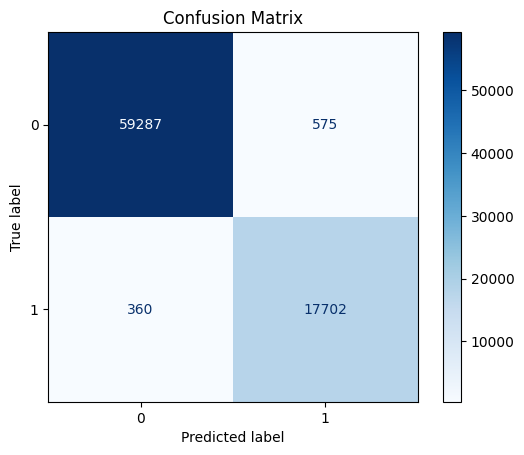

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# LSTM

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [53]:
# Assuming X and y are already defined from previous steps
X= X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']].values
y = df['Is_Laundering'].values
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM input: (samples, time steps, features)
# Assuming X_train and X_test have shapes (samples, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])


In [54]:
model = Sequential()

# LSTM layer with dropout
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print summary of the model
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11451 (44.73 KB)
Trainable params: 11451 (44.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [56]:
# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test_reshaped, y_test), callbacks=[early_stop])


Epoch 1/20
5682/5682 [==============================] - 32s 6ms/step - loss: 0.3150 - accuracy: 0.8529 - val_loss: 0.3029 - val_accuracy: 0.8556
Epoch 2/20
5682/5682 [==============================] - 26s 5ms/step - loss: 0.3127 - accuracy: 0.8530 - val_loss: 0.3000 - val_accuracy: 0.8559
Epoch 3/20
5682/5682 [==============================] - 25s 4ms/step - loss: 0.3113 - accuracy: 0.8537 - val_loss: 0.2959 - val_accuracy: 0.8569
Epoch 4/20
5682/5682 [==============================] - 27s 5ms/step - loss: 0.3091 - accuracy: 0.8553 - val_loss: 0.2937 - val_accuracy: 0.8571
Epoch 5/20
5682/5682 [==============================] - 28s 5ms/step - loss: 0.3074 - accuracy: 0.8551 - val_loss: 0.2915 - val_accuracy: 0.8572
Epoch 6/20
5682/5682 [==============================] - 32s 6ms/step - loss: 0.3056 - accuracy: 0.8554 - val_loss: 0.2902 - val_accuracy: 0.8589
Epoch 7/20
5682/5682 [==============================] - 26s 5ms/step - loss: 0.3038 - accuracy: 0.8562 - val_loss: 0.2876 - val_ac

2436/2436 [==============================] - 14s 6ms/step - loss: 0.2684 - accuracy: 0.8679
Test Accuracy: 0.8679354190826416
2436/2436 [==============================] - 10s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     59862
           1       0.83      0.54      0.65     18062

    accuracy                           0.87     77924
   macro avg       0.85      0.75      0.79     77924
weighted avg       0.86      0.87      0.86     77924



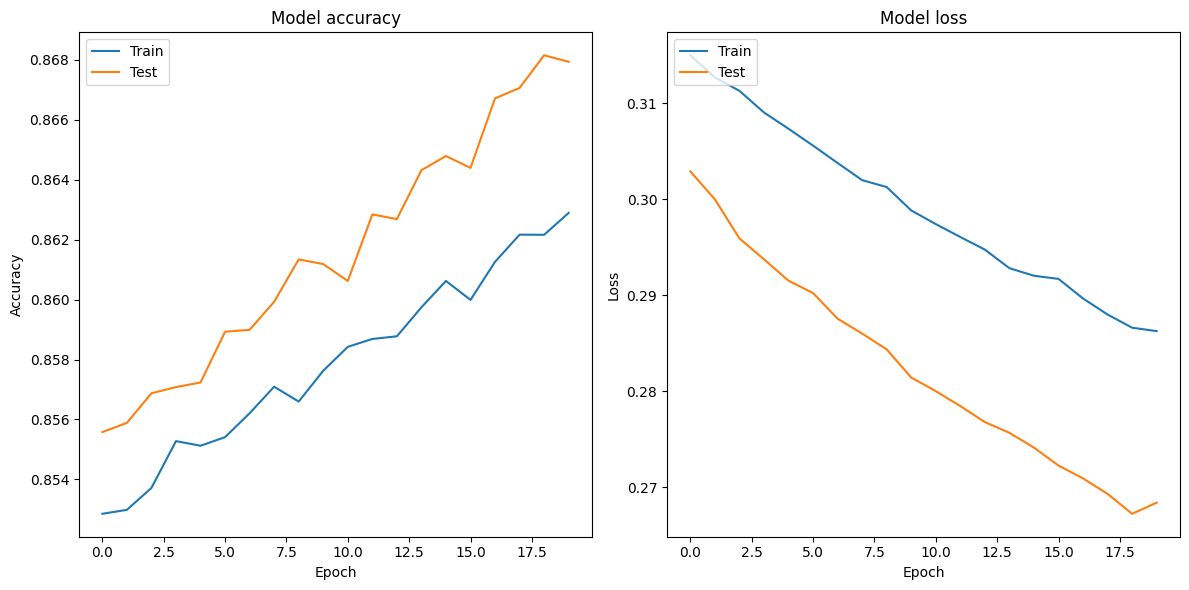

In [58]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
# Assuming model.predict(X_test_reshaped) returns probabilities or logits
predictions = model.predict(X_test_reshaped)

# Convert predictions to class labels
predicted_classes = (predictions > 0.5).astype(int)  # Example threshold of 0.5, adjust as needed

# Print classification report or any other evaluation metric
print(classification_report(y_test, predicted_classes))


# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


2436/2436 [==============================] - 14s 6ms/step


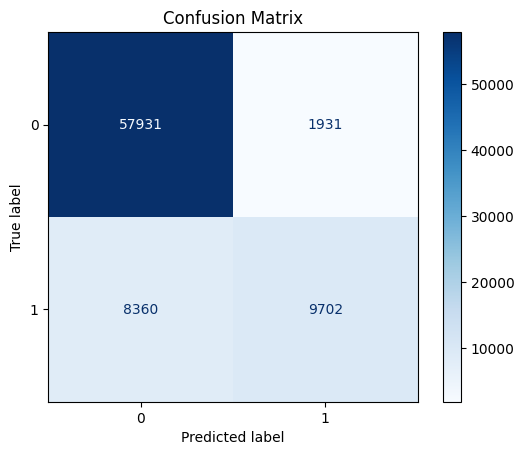

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming predictions and y_test are already defined as per the previous code
predictions = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# GRU

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

In [61]:
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']].values
y = df['Is_Laundering'].values


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [65]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(GRU(50))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/10
2273/2273 - 21s - loss: 0.3658 - accuracy: 0.8436 - val_loss: 0.3415 - val_accuracy: 0.8463 - 21s/epoch - 9ms/step
Epoch 2/10
2273/2273 - 13s - loss: 0.3380 - accuracy: 0.8476 - val_loss: 0.3360 - val_accuracy: 0.8442 - 13s/epoch - 6ms/step
Epoch 3/10
2273/2273 - 17s - loss: 0.3317 - accuracy: 0.8490 - val_loss: 0.3286 - val_accuracy: 0.8473 - 17s/epoch - 8ms/step
Epoch 4/10
2273/2273 - 13s - loss: 0.3264 - accuracy: 0.8498 - val_loss: 0.3253 - val_accuracy: 0.8481 - 13s/epoch - 6ms/step
Epoch 5/10
2273/2273 - 14s - loss: 0.3214 - accuracy: 0.8507 - val_loss: 0.3232 - val_accuracy: 0.8512 - 14s/epoch - 6ms/step
Epoch 6/10
2273/2273 - 13s - loss: 0.3153 - accuracy: 0.8518 - val_loss: 0.3128 - val_accuracy: 0.8505 - 13s/epoch - 6ms/step
Epoch 7/10
2273/2273 - 14s - loss: 0.3075 - accuracy: 0.8534 - val_loss: 0.3042 - val_accuracy: 0.8523 - 14s/epoch - 6ms/step
Epoch 8/10
2273/2273 - 13s - loss: 0.2989 - accuracy: 0.8557 - val_loss: 0.2944 - val_accuracy: 0.8561 - 13s/epoch - 6

In [68]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.8628407120704651


In [69]:
predictions = (model.predict(X_test_reshaped) > 0.5).astype(int)

2436/2436 [==============================] - 10s 3ms/step


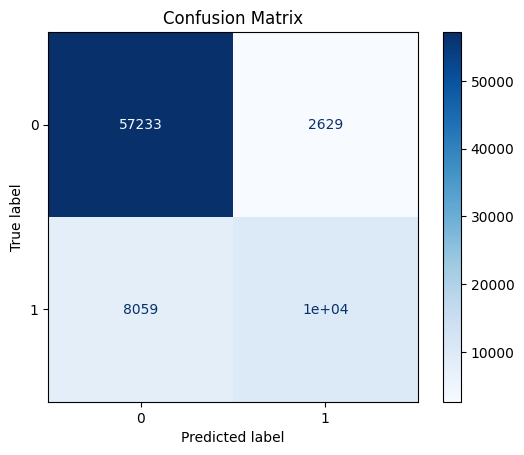

In [70]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ARIMAX

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
df=pd.read_csv('SAML-D_cleaned_04.csv')

In [4]:
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]
y = df['Is_Laundering']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arimax_model = model.fit(disp=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = arimax_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

In [ ]:
predictions_binary = (predictions > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, predictions_binary)
print(f"Accuracy: {accuracy}")

In [ ]:
cm = confusion_matrix(y_test, predictions_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()